In [81]:
import pandas as pd

In [82]:
import numpy as np

In [83]:
import os

In [84]:
pwd

'C:\\Users\\jinal\\Downloads'

In [85]:
df=pd.read_csv(r"E:\DEvideos.csv")

In [86]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
video_id                  40840 non-null object
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [88]:
df.shape

(40840, 16)

In [89]:
df['comments_disabled'].value_counts(normalize=True)

False    0.974437
True     0.025563
Name: comments_disabled, dtype: float64

In [90]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [91]:
%matplotlib inline

In [92]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.088889,-0.097912,-0.011286,-0.043226,0.010278,-0.021613,-0.026903
views,-0.088889,1.000000,0.824189,0.556000,0.705516,-0.002901,-0.002793,0.003825
likes,-0.097912,0.824189,1.000000,0.460208,0.852492,-0.028049,-0.027795,0.002520
dislikes,-0.011286,0.556000,0.460208,1.000000,0.642144,-0.011295,-0.012397,-0.000408
comment_count,-0.043226,0.705516,0.852492,0.642144,1.000000,-0.025846,-0.014391,0.000145
comments_disabled,0.010278,-0.002901,-0.028049,-0.011295,-0.025846,1.000000,0.259541,-0.002999
ratings_disabled,-0.021613,-0.002793,-0.027795,-0.012397,-0.014391,0.259541,1.000000,-0.002395
video_error_or_removed,-0.026903,0.003825,0.002520,-0.000408,0.000145,-0.002999,-0.002395,1.000000


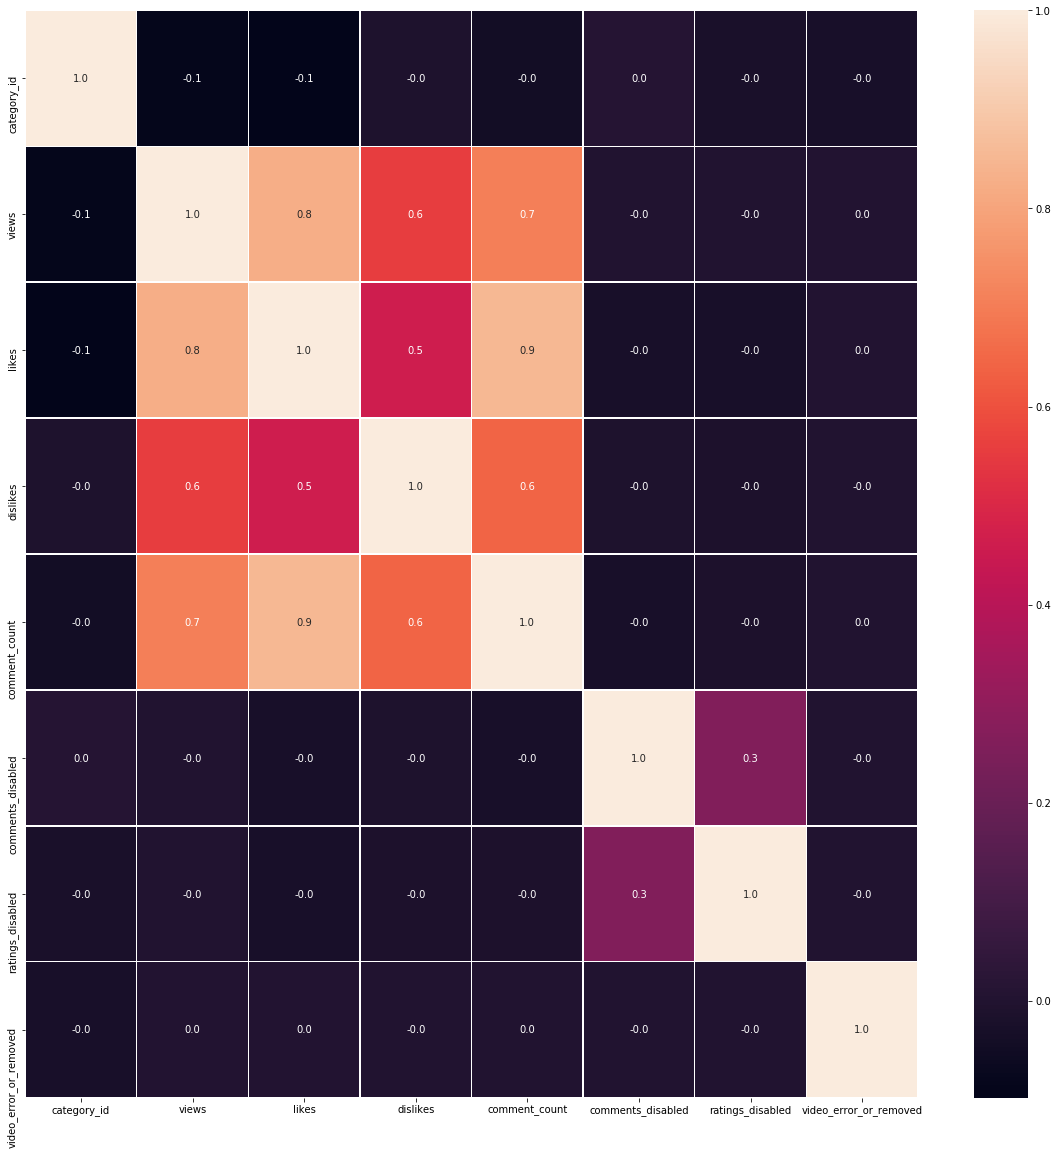

In [93]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [94]:
df['likes_log'] = np.log(df['likes'] + 1)

In [95]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [96]:
df['views_log']=np.log(df['views'] + 1)

In [97]:
df['dislikes_log']=np.log(df["dislikes"] + 1)

In [98]:
df["comment_log"]=np.log(df["comment_count"] + 1)

In [99]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Likes Log Distribution')

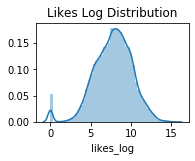

In [100]:
plt.subplot(223)
g=sns.distplot(df['likes_log'])
g.set_title("Likes Log Distribution")

Text(0.5, 1.0, 'Views Log Distribution')

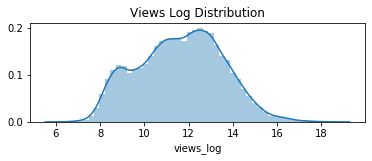

In [101]:
plt.subplot(212)
g1=sns.distplot(df['views_log'])
g1.set_title("Views Log Distribution")

Text(0.5, 1.0, 'Dislikes Log Distribution')

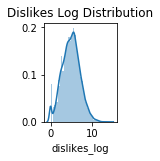

In [102]:
plt.subplot(243)
g2=sns.distplot(df['dislikes_log'])
g2.set_title("Dislikes Log Distribution")

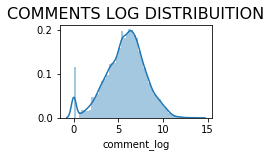

In [103]:
plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

In [104]:
df['categoryName']=np.nan

In [105]:
df.loc[(df["category_id"] == 1),"categoryName"] = 'Film and Animation'

In [106]:
df.loc[(df["category_id"] == 15),"categoryName"] = 'People & Blogs'

In [107]:
df.loc[(df["category_id"] == 10),"categoryName"] = 'Comedy'

In [108]:
df.loc[(df["category_id"] == 17),"categoryName"] = 'Sports'

In [109]:
df.loc[(df["category_id"] == 22),"categoryName"] = 'Science & Technology'

In [110]:
df.loc[(df["category_id"] == 24),"categoryName"] = 'Entertainment'

In [111]:
df.loc[(df["category_id"] == 25),"categoryName"] = 'News and Politics'

In [112]:
df.loc[(df["category_id"] == 27),"categoryName"] = 'Music'

In [113]:
df.loc[(df["category_id"] == 23),"categoryName"] = 'News'

In [114]:
df.loc[(df["category_id"] == 26),"categoryName"] = 'Tutorials'

In [115]:
print("Category Name Count")

Category Name Count


In [116]:
print(df.categoryName.value_counts()[:5])
plt.figure(figsize= (14,10))

Entertainment           15292
Science & Technology     5988
News and Politics        2935
Sports                   2752
News                     2534
Name: categoryName, dtype: int64


<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

Text(0, 0.5, 'Count')

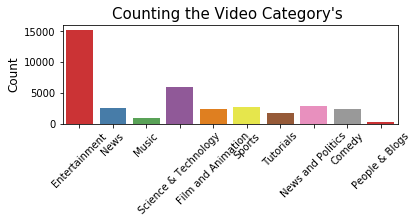

In [117]:
plt.subplot(211)
g = sns.countplot('categoryName', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

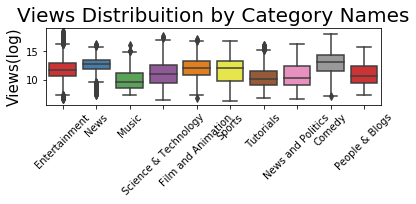

In [118]:
plt.subplot(212)
g1 = sns.boxplot(x='categoryName', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.show()

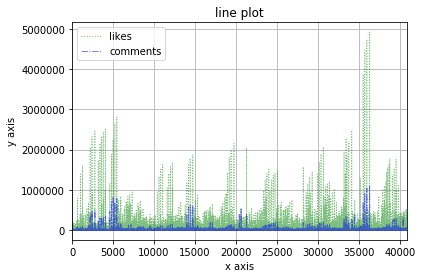

In [119]:
df.likes.plot(kind='line', color='g', label='likes' , linewidth=1,alpha=0.5, grid=True,linestyle=':')
df.comment_count.plot(color='b', label='comments' , linewidth=1,alpha=0.5, grid=True,linestyle='-.')
plt.legend(loc='upper left')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('line plot')
plt.show()

Text(0.5, 1.0, 'Like and Comment Counts Scatter Plot')

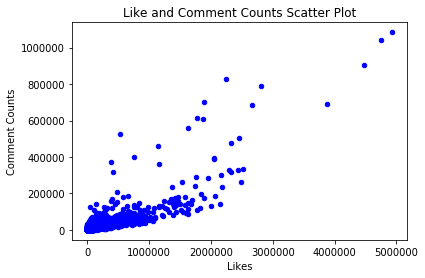

In [120]:
df.plot(kind='scatter', x='likes', y='comment_count',alpha = 1.0,color = 'blue')
plt.xlabel('Likes')              # label = name of label
plt.ylabel('Comment Counts')
plt.title('Like and Comment Counts Scatter Plot')  

Text(0.5, 1.0, 'View and Comment Counts Scatter Plot')

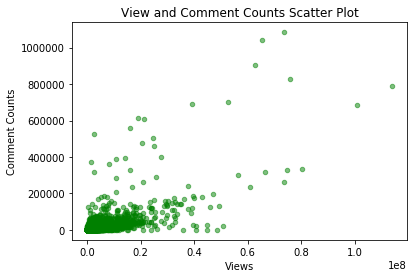

In [121]:
df.plot(kind='scatter', x='views', y='comment_count',alpha = 0.5,color = 'green')
plt.xlabel('Views')              
plt.ylabel('Comment Counts')
plt.title('View and Comment Counts Scatter Plot')  

Text(0.5, 1.0, 'Like and Dislikes Scatter Plot')

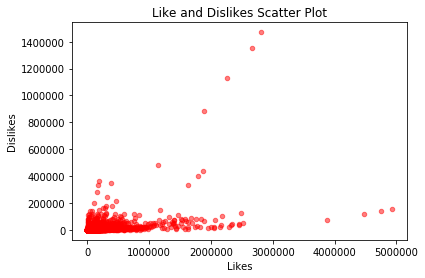

In [122]:
df.plot(kind='scatter', x='likes', y='dislikes',alpha = 0.5,color = 'red')
plt.xlabel('Likes')              
plt.ylabel('Dislikes')
plt.title('Like and Dislikes Scatter Plot')  

In [123]:
df[(df['likes']>600000) & (df['dislikes']>600000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,categoryName
4799,FlsCjmMhFmw,17.08.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891817,884959,...,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",14.453049,17.778450,13.693298,13.462806,Entertainment
5004,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251819,1127810,...,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",14.627249,18.145842,13.935789,13.626474,Entertainment
5221,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656675,1353652,...,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",14.792586,18.429755,14.118317,13.434091,Entertainment
5455,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470386,...,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",14.849128,18.550623,14.201036,13.576206,Entertainment


In [124]:
import string
import re
import nltk

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jinal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
from nltk.corpus import stopwords

In [127]:
import matplotlib as ml

In [128]:
import spacy

In [129]:
from nltk import pos_tag

In [130]:
from nltk.stem.wordnet import WordNetLemmatizer

In [131]:
from nltk.tokenize import word_tokenize

In [132]:
from nltk.tokenize import TweetTokenizer

In [133]:
from subprocess import check_output

In [134]:
from os import path

In [135]:
from PIL import Image

In [136]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [137]:
import os

In [138]:
os.getcwd()

'C:\\Users\\jinal\\Downloads'

In [139]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
likes_log                    0
views_log                    0
dislikes_log                 0
comment_log                  0
categoryName              3751
dtype: int64

In [140]:
print(df.categoryName.value_counts())

Entertainment           15292
Science & Technology     5988
News and Politics        2935
Sports                   2752
News                     2534
Film and Animation       2376
Comedy                   2372
Tutorials                1745
Music                     844
People & Blogs            251
Name: categoryName, dtype: int64


In [141]:
v_count=df[['channel_title','views','publish_time']]


In [142]:
v_count=v_count.sort_values('views',ascending=False)

In [143]:
v_count['publish_time']=pd.DatetimeIndex(df['publish_time']).year

In [144]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

Text(0, 0.5, 'Count')

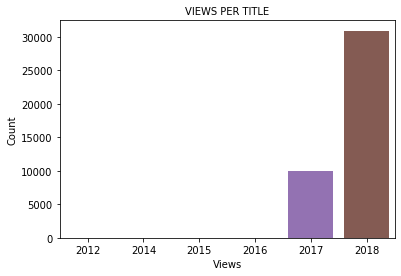

In [145]:
ax=sns.countplot(x='publish_time',data=v_count)
ax.set_title("VIEWS PER TITLE",fontsize=10)
ax.set_xlabel("Views",fontsize=10)
ax.set_ylabel("Count",fontsize=10)

In [146]:
l_count=df[['likes','publish_time']]

C:\Users\jinal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Likes')

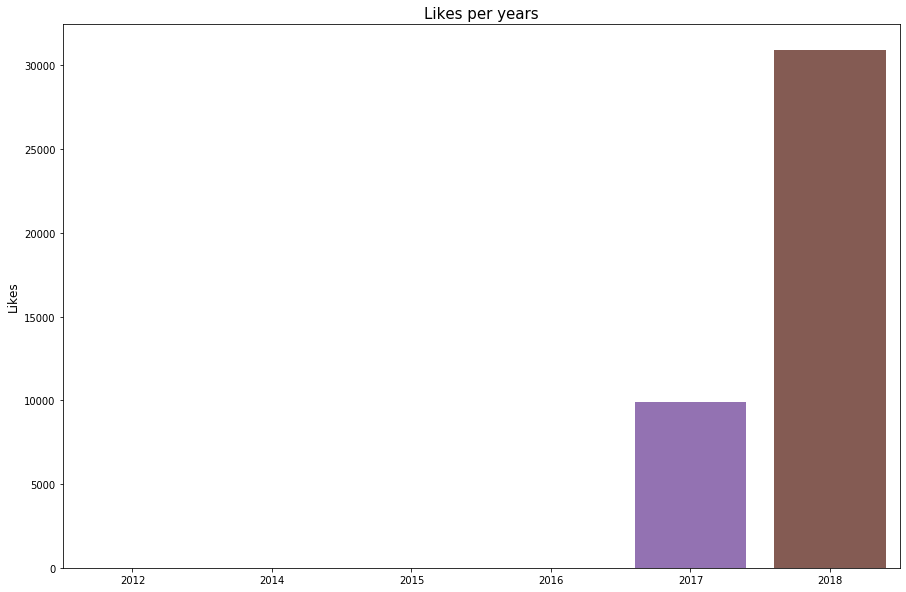

In [147]:
l_count= df[['likes', 'publish_time']]
plt.figure(figsize = (15,10))
l_count['publish_time'] = pd.DatetimeIndex(l_count['publish_time']).year
ax = sns.countplot(x="publish_time", data=l_count)
ax.set_title("Likes per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Likes", fontsize=12)

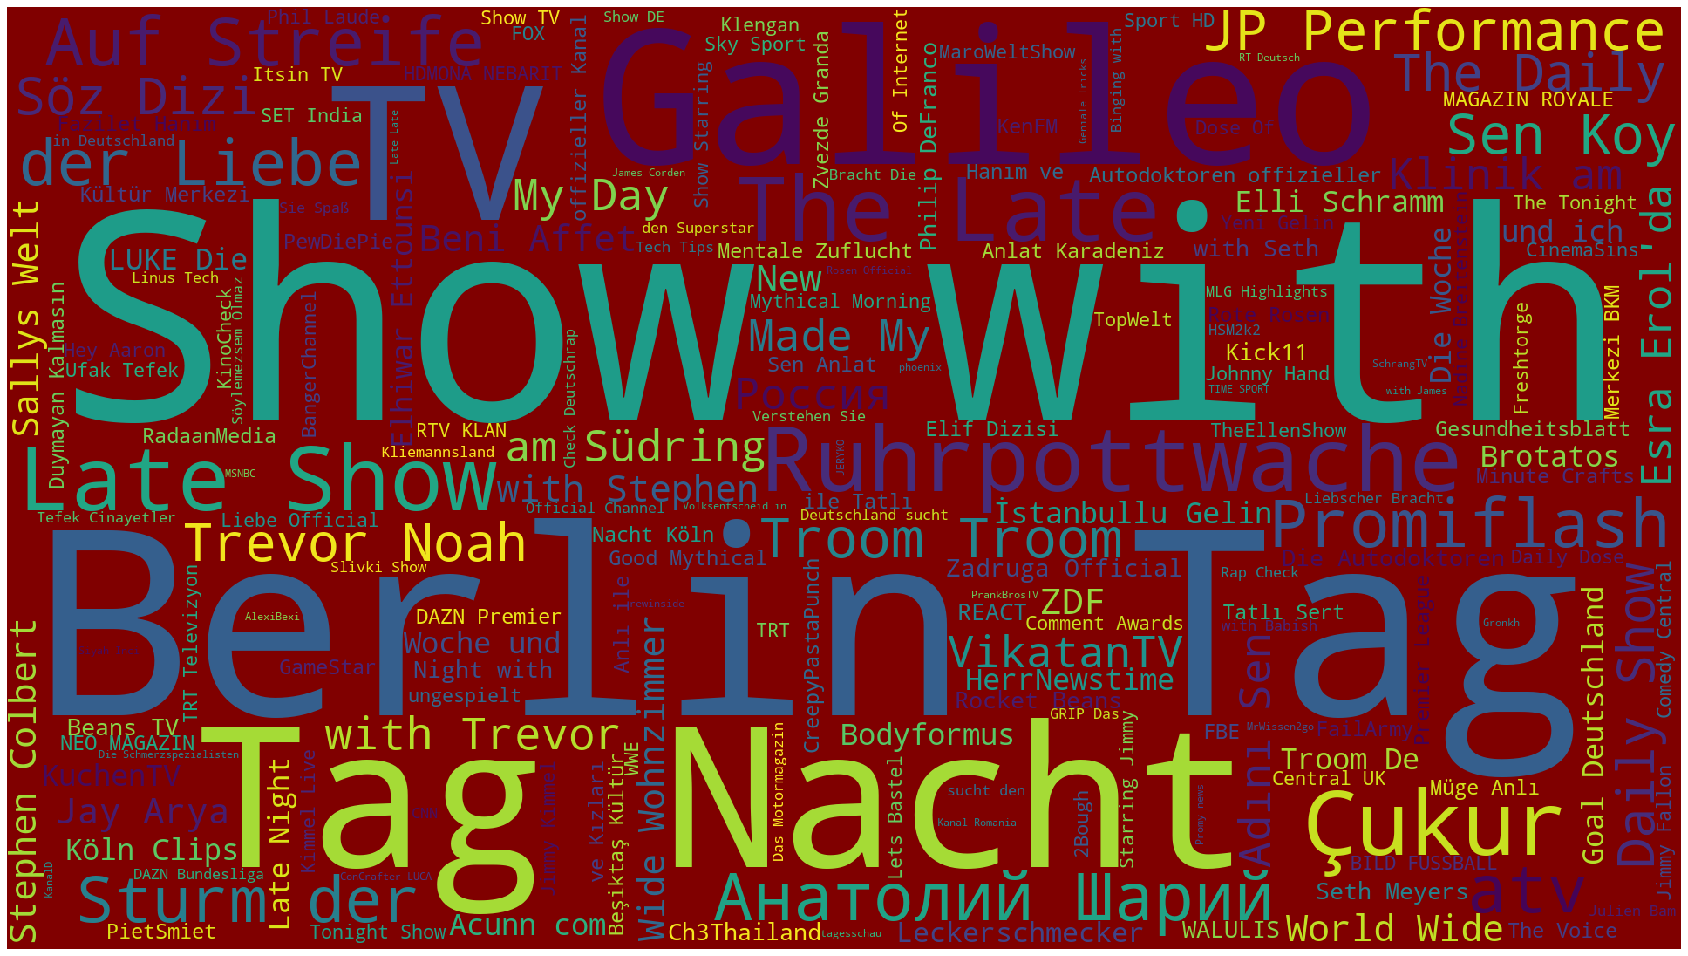

In [152]:
plt.figure(figsize=(30,20))
wc=WordCloud(background_color='maroon',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [153]:
supreme=df[['channel_title','views']]
supreme=supreme.groupby('channel_title')['views'].sum()

In [154]:
supreme=pd.DataFrame(supreme)

In [169]:
supreme=supreme.sort_values('views',ascending=False)

In [170]:
supreme=supreme[:10]

In [171]:
supreme=supreme.reset_index()

In [172]:
supreme.head()

,level_0,index,channel_title,views
0,9,9,Simply Kaddi,1210
1,8,8,René Plöchl,1192
2,7,7,Dean Freemann Fashion,1178
3,6,6,Charlotte Blackburn,1176
4,5,5,Men's Room,1158


Text(0, 0.5, 'views_count')

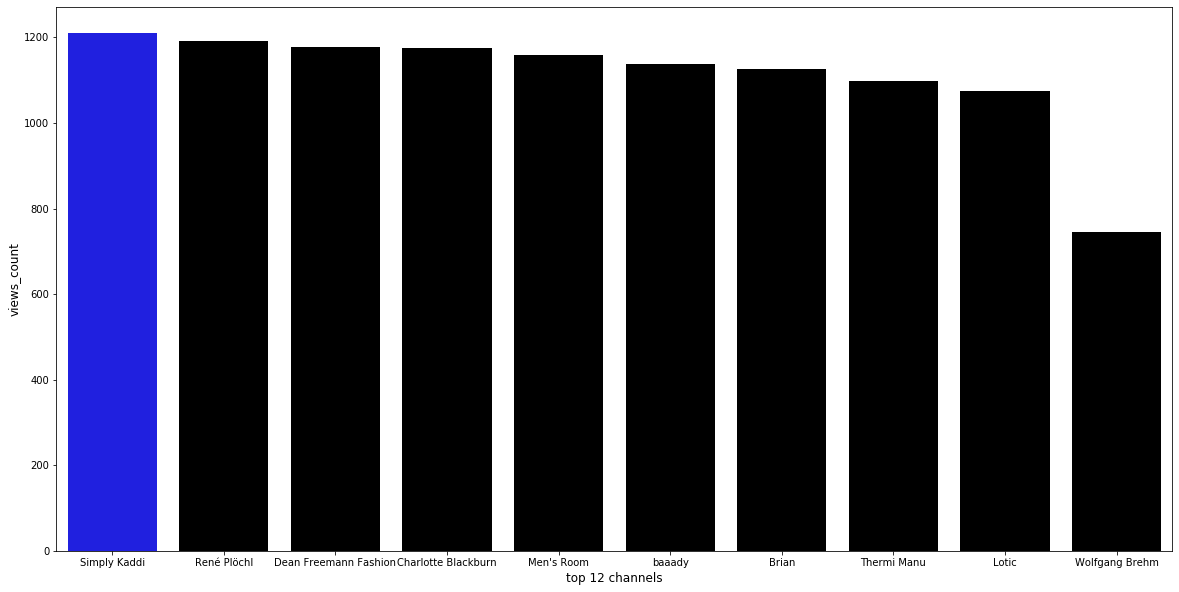

In [179]:
plt.figure(figsize=(20,10))
c=['blue','black','black','black','black','black','black','black','black','black','black','black']
ax=sns.barplot(data=supreme,x='channel_title',y='views',palette=c)
ax.set_xlabel(xlabel="top 12 channels",fontsize=12)
ax.set_ylabel(ylabel="views_count",fontsize=12)

In [180]:
year=df[['publish_time','video_id']]

In [181]:
year['publish_time']=pd.DatetimeIndex(year['publish_time']).year

C:\Users\jinal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
year=year.groupby('publish_time')['video_id'].count()

In [184]:
year=pd.DataFrame(year)

In [ ]:
year=year.sort_values('publish_time',ascending)